In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Analytical Solution

Starting with the second order differential equation:
$$u'' +2u' +u = 0$$
with initial conditions 
$$u'(0)= 0, u(0) = 1$$

We assume a solution of the form $u(t) = e^{\lambda t}$, plugging this *ansatz* into the differential equation and dividng both sides by  $e^{\lambda t}$ results in the characteristic polynomial:
$$\lambda ^2 + 2 \lambda +1 = 0$$
This factors to
$$(\lambda +1)(\lambda+1) = 0$$
Thus,
$$\lambda = -1,-1$$

This is a repeated root so the general solution is given by
$$u(t) = Ae^{-t}+Bte^{-t}$$

To solve for $A$ and $B$, we will apply the initial conditions. We will first start by taking the first derivative of $u(t)$:
$$u'(t) = -Ae^{-t}+Be^{-t}-Bte^{-t}$$

$$u(0) =1 = Ae^0 + B(0)e^0 \implies A=1$$
$$u'(0) = 0 = -Ae^0+Be^0 -B(0)e^0 \implies 0 = -1 + B \implies B = 1$$

We (finally) get to our particular solution:
$$u(t) = e^{-t}+te^{-t} = (1+t)  e^{-t}$$

We will start by plotting the exact (analytical) solution. We call for step size $\Delta t = 0.1$ so we can find the number of steps as
$$ \Delta t = \frac{t_f - t_i}{N} \iff N = \frac{t_f -t_i}{\Delta t}$$
For this problem, we are considering the interval where $t_i = 0$  and $t_f=10$.

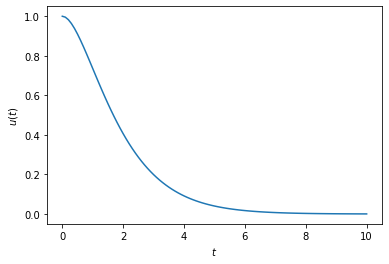

In [2]:
dt =  0.1
N = int(10./dt)
t = np.linspace(0,10,N+1)

u_analytic = (1.+t)*np.exp(-t)

plt.plot(t,u_analytic)
plt.xlabel('$t$')
plt.ylabel('$u(t)$')

u_prime = -t*np.exp(-t)

## Forward Euler
We start by reducing $$u'' +2u' +u =0$$ from second order to two first order differential equations.
 
Let $u_1 = u(t)$, and let $u_2 = u'(t)$.
 
Then, $u_1 ' = u'(t) = u_2$ and $u_2' = u''(t) = -2u_2 - u_1$.
 
Rewriting this as a matrix:
$$\left( \begin{array}{c} u_1' \\ u_2'\end{array} \right) = \left( \begin{array}{cc} 0 & 1\\ -1 & -2\end{array} \right) \left( \begin{array}{c} u_1 \\ u_2\end{array} \right)  $$
 
We recall that forward Euler is given by
$$x_{i +1} = x_i  + \Delta t f(t_i , x_i)$$
 
Letting $u_1 = x$ and $u_2 = y$, we can represent our system as
$$\left( \begin{array}{c} x_{i+1} \\ y_{i+1}\end{array} \right) =\left( \begin{array}{c} x_{i} \\ y_{i}\end{array} \right)+ \Delta t \left( \begin{array}{cc} 0 & 1\\ -1 & -2\end{array} \right) \left( \begin{array}{c} x_i \\ y_i\end{array} \right)  $$
 
And combining like terms:
$$\left( \begin{array}{c} x_{i+1} \\ y_{i+1}\end{array} \right) = \left( \begin{array}{cc} 1 & \Delta t\\ -\Delta t & 1-2\Delta t\end{array} \right) \left( \begin{array}{c} x_i \\ y_i\end{array} \right)  $$

In [3]:
def forward(dt,tf,ti,x_0,y_0):

    #Determine Number of Time Steps
    N = int((tf-ti)/dt)

    # Make initialized arrays for x_i and y_i for all time
    xi = np.zeros(N+1) 
    yi = np.zeros(N+1)

    # Initial condition on array (for this problem we could have used np.ones(N) for xi, but we extend to a general case)
    t = np.linspace(ti,tf,N+1)
    xi[0] = x_0
    yi[0] = y_0

    # Construct evolution matrix

    A = np.matrix([[1.,dt],[-dt,1.-2.*dt]])
   
  
    # Go through the process

    for ii in range(0,N):
        xi[ii+1] = A[0]*np.matrix([[xi[ii]],[yi[ii]]])
        yi[ii+1] = A[1]*np.matrix([[xi[ii]],[yi[ii]]])
    
    return xi,  yi

## Backward Euler
We will start with the same system as the Forward Euler Method
where $u_1 = u(t)$,  $u_2 = u'(t)$, $u_1 ' = u'(t) = u_2$ and $u_2' = u''(t) = -2u_2 - u_1$, resulting in the matrix: 
$$\left( \begin{array}{c} u_1' \\ u_2'\end{array} \right) = \left( \begin{array}{cc} 0 & 1\\ -1 & -2\end{array} \right) \left( \begin{array}{c} u_1 \\ u_2\end{array} \right)  $$
 


 We recall that backward Euler is given by
$$x_{i +1} = x_i  + \Delta t f(t_{i+1} , x_{i+1})$$
 
Letting $u_1 = x$ and $u_2 = y$, we can represent our system as
$$\left( \begin{array}{c} x_{i+1} \\ y_{i+1}\end{array} \right) =\left( \begin{array}{c} x_{i} \\ y_{i}\end{array} \right)+ \Delta t \left( \begin{array}{cc} 0 & 1\\ -1 & -2\end{array} \right) \left( \begin{array}{c} x_{i+1} \\ y_{i+1}\end{array} \right)  $$

We subtract the ${x_{i+1}}$ and $y_{i+1}$ term on both sides, and collecting like terms:

$$ \left( \begin{array}{cc} 1 & -\Delta t\\ \Delta t & 1+2\Delta t\end{array} \right) 
\left( \begin{array}{c} x_{i+1} \\ y_{i+1}\end{array} \right) =\left( \begin{array}{c} x_{i} \\ y_{i}\end{array} \right)  $$

Multiplying by $$\left( \begin{array}{cc} 1 & -\Delta t\\ \Delta t & 1+2\Delta t\end{array} \right)^{-1} $$ on both sides results in


$$\left( \begin{array}{c} x_{i+1} \\ y_{i+1}\end{array} \right) = \left( \begin{array}{cc} 1 & -\Delta t\\ \Delta t & 1+2\Delta t\end{array} \right)^{-1} \left( \begin{array}{c} x_{i} \\ y_{i}\end{array} \right)  $$

In [4]:
from numpy.linalg import inv

In [5]:
def backward(dt,tf,ti,x_0,y_0):

    #Determine Number of Time Steps
    N = int((tf-ti)/dt)

    # Make initialized arrays for x_i and y_i for all time
    xi = np.zeros(N+1) 
    yi = np.zeros(N+1)

    # Initial condition on array
    xi[0] = x_0
    yi[0] = y_0

    # Construct evolution matrix

    A = np.matrix([[1.,-dt],[dt,1.+2.*dt]])
    A_inv = inv(A)
   
  
    # Go through the process

    for ii in range(0,N):
        xi[ii+1] = A_inv[0]*np.matrix([[xi[ii]],[yi[ii]]])
        yi[ii+1] = A_inv[1]*np.matrix([[xi[ii]],[yi[ii]]])
    
    return xi, yi


## Implicit Trapezoid Rule
The Trapezoid Rule is defined as
$$x_{i+1} = x_i + \frac{\Delta t}{2} \left[ f(t_i,x_i) +f(t_{i+1},x_{i+1})\right]$$

Using the results from both the forward and backward Euler methods, we obtain:

$$\left( \begin{array}{c} x_{i+1} \\ y_{i+1}\end{array} \right) =\left( \begin{array}{c} x_{i} \\ y_{i}\end{array} \right)+ \frac{\Delta t}{2} \left( \begin{array}{cc} 0 & 1\\ -1 & -2\end{array} \right) \left( \begin{array}{c} x_i \\ y_i\end{array} \right)  + \frac{\Delta t}{2}\left( \begin{array}{cc} 0 & 1\\ -1 & -2\end{array} \right) \left( \begin{array}{c} x_{i+1} \\ y_{i+1}\end{array} \right)$$

Then, rearranging to have the $i+1$ terms on the LHS and the $i$ terms on the RHS:

$$\left( \begin{array}{c} x_{i+1} \\ y_{i+1}\end{array} \right) - \frac{\Delta t}{2}\left( \begin{array}{cc} 0 & 1\\ -1 & -2\end{array} \right) \left( \begin{array}{c} x_{i+1} \\ y_{i+1}\end{array} \right)=\left( \begin{array}{c} x_{i} \\ y_{i}\end{array} \right)+ \frac{\Delta t}{2} \left( \begin{array}{cc} 0 & 1\\ -1 & -2\end{array} \right) \left( \begin{array}{c} x_i \\ y_i\end{array} \right) $$

$$ \implies \left[\left( \begin{array}{cc} 1 & 0 \\ 0 & 1 \end{array} \right) + \left( \begin{array}{cc} 0 & -\Delta t /2 \\ \Delta t /2 & \Delta t \end{array}\right)\right] \left( \begin{array}{c} x_{i+1} \\ y_{i+1}\end{array} \right) = \left[\left( \begin{array}{cc} 1 & 0 \\ 0 & 1 \end{array} \right) + \left( \begin{array}{cc} 0 & \Delta t /2 \\ -\Delta t /2 & -\Delta t \end{array}\right)\right] \left( \begin{array}{c} x_i \\ y_i\end{array} \right)$$
$$\implies \left(\begin{array}{cc} 1 & - \Delta t /2 \\ \Delta t /2 & 1 + \Delta t\end{array} \right) \left( \begin{array}{c} x_{i+1} \\ y_{i+1}\end{array} \right) =\left(\begin{array}{cc} 1 &  \Delta t /2 \\ -\Delta t /2 & 1 -\Delta t\end{array} \right) \left( \begin{array}{c} x_{i} \\ y_{i}\end{array} \right) $$

We then multiply both sides by 
$$ \left(\begin{array}{cc} 1 & - \Delta t /2 \\ \Delta t /2 & 1 + \Delta t\end{array} \right)^{-1}$$
to get 
$$ \left( \begin{array}{c} x_{i+1} \\ y_{i+1}\end{array} \right) = \left[\left( \begin{array}{cc} 1 & 0 \\ 0 & 1 \end{array} \right) + \left( \begin{array}{cc} 0 & \Delta t /2 \\ -\Delta t /2 & -\Delta t \end{array}\right)\right] \left( \begin{array}{c} x_i \\ y_i\end{array} \right)$$
$$\implies \left(\begin{array}{cc} 1 & - \Delta t /2 \\ \Delta t /2 & 1 + \Delta t\end{array} \right) \left( \begin{array}{c} x_{i+1} \\ y_{i+1}\end{array} \right) = \left(\begin{array}{cc} 1 & - \Delta t /2 \\ \Delta t /2 & 1 + \Delta t\end{array} \right)^{-1}\left(\begin{array}{cc} 1 &  \Delta t /2 \\ -\Delta t /2 & 1 -\Delta t\end{array} \right) \left( \begin{array}{c} x_{i} \\ y_{i}\end{array} \right)$$

We could solve for the product of this matrix by hand, but we have computers...

In [6]:
def trapezoid(dt,tf,ti,x_0,y_0):

    #Determine Number of Time Steps
    N = int((tf-ti)/dt)

    # Make initialized arrays for x_i and y_i for all time
    xi = np.zeros(N+1) 
    yi = np.zeros(N+1)

    # Initial condition on array
    xi[0] = x_0
    yi[0] = y_0

    # Construct evolution matrix

    A = np.matrix([[1.,-dt/2.],[dt/2.,1.+dt]])
    A_inv = inv(A)

    B = np.matrix([[1.,dt/2.],[-dt/2.,1.-dt]])
    M = A_inv*B
  
    # Go through the process

    for ii in range(0,N):
        xi[ii+1] = M[0]*np.matrix([[xi[ii]],[yi[ii]]])
        yi[ii+1] = M[1]*np.matrix([[xi[ii]],[yi[ii]]])
    
    
    return xi, yi

In [7]:
## Initial Conditions

x_0 = 1. # u(0) = 1
y_0 = 0. # u'(0) = 0

# Interval
tf = 10.
ti = 0.

# Time Step
dt = 0.1

u_forward,v_forward = forward(dt,tf,ti,x_0,y_0)
u_backward,v_backward = backward(dt,tf,ti,x_0,y_0)
u_trapezoid,v_trapezoid = trapezoid(dt,tf,ti,x_0,y_0)



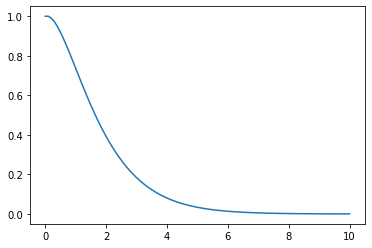

In [8]:
u1=forward(dt,tf,ti,x_0,y_0)
plt.plot(t,u1[0])

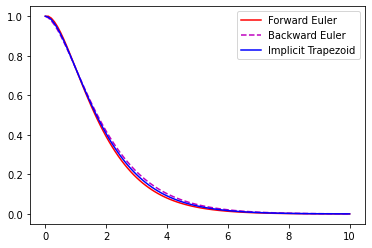

In [9]:
plt.plot(t,u_forward,c = 'r',label= 'Forward Euler')
plt.plot(t,u_backward,'--',c = 'm', label = 'Backward Euler')
plt.plot(t,u_trapezoid, c= 'b', label = 'Implicit Trapezoid')
plt.legend(loc='upper right')

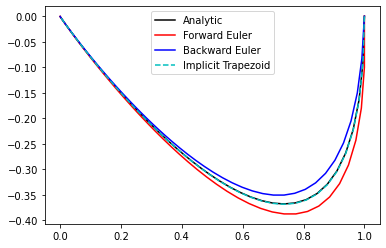

In [10]:
plt.plot(u_analytic,u_prime, c= 'k',label = 'Analytic')
plt.plot(u_forward,v_forward,c = 'r',label= 'Forward Euler')
plt.plot(u_backward,v_backward,c = 'b', label = 'Backward Euler')
plt.plot(u_trapezoid,v_trapezoid, '--', c= 'c', label = 'Implicit Trapezoid')

plt.legend(loc='upper center')

In [11]:
from numpy.linalg import norm

In [12]:
def error(dt,tf,ti,x_0,y_0):
    N = int((tf-ti)/dt)
    t = np.linspace(ti,tf,N+1)

    u_analytic = (1.+t)*np.exp(-t)
    u_forward,dummy = forward(dt,tf,ti,x_0,y_0)

    u_backward,dummy = backward(dt,tf,ti,x_0,y_0)
    u_trapezoid,dummy = trapezoid(dt,tf,ti,x_0,y_0)
    
    #################################################################################
    # This is tricky, because my slides for global error, assume estimating
    # values for lots of x's at some time step t. Like the heat equation
    # we solved where the bar had some length, and we solved it for each time step.
    # 
    # For this example, there is only one 'x', and we solve it each time step.
    # 
    # Maybe think of the error. If there is a bar, we have a bunch of estimates 
    # of the values along it, based on the previous. And they all have the same error.
    # So a single point has an error, and all of them together have an combined error.
    #
    # For this problem, there is only one estimated value from each iteration. So 
    # we cannot use the tests for errors because we only have one value. But if we
    # adjust our error measurements, we can retrieve the same information.
    
    # If I pick an early N, there are not enough calculations for the 
    # error to accumulate. This should approximate the local error.
    N = int(10)
    LTE_forward = np.abs(u_analytic[N]-u_forward[N])
    LTE_backward = np.abs(u_analytic[N]-u_backward[N])
    LTE_trapezoid = np.abs(u_analytic[N]-u_trapezoid[N])

    # Now, we pick the last N, and the error is the global error.
    N = int((tf-ti)/dt)
    GTE_forward = np.abs(u_analytic[N]-u_forward[N])
    GTE_backward = np.abs(u_analytic[N]-u_backward[N])
    GTE_trapezoid = np.abs(u_analytic[N]-u_trapezoid[N])
    
    # proper L2 norm?
    #GTE_forward = norm(np.abs(u_analytic-u_forward), ord=2)
    #GTE_backward = norm(np.abs(u_analytic-u_backward), ord=2)
    #GTE_trapezoid = norm(np.abs(u_analytic-u_trapezoid), ord=2)

    return LTE_forward, LTE_backward, LTE_trapezoid, GTE_forward, GTE_backward, GTE_trapezoid

In [13]:
# Jareds alternate way of LTE, from the code I presented in class.
def altError(dt,tf,ti,x_0,y_0):
    N = int((tf-ti)/dt)
    t = np.linspace(ti,tf,N+1)

    u_analytic = (1.+t)*np.exp(-t)
    u_forward,dummy = forward(dt,tf,ti,x_0,y_0)

    u_backward,dummy = backward(dt,tf,ti,x_0,y_0)
    u_trapezoid,dummy = trapezoid(dt,tf,ti,x_0,y_0)

    # We could norm the values by dividing by how many
    # N we used, and that should give us the local truncation error.
    #
    # In normal words: This is the error, but we took "N" steps to get here. 
    # If we make this "N" into one, that should tell us the error for each step.
    LTE_forward = np.abs(u_analytic[N]-u_forward[N]) / N
    LTE_backward = np.abs(u_analytic[N]-u_backward[N]) / N
    LTE_trapezoid = np.abs(u_analytic[N]-u_trapezoid[N]) / N
    
    return LTE_forward, LTE_backward, LTE_trapezoid

In [14]:
step = [0.01,0.01/2., 0.01/4., 0.01/8.,0.01/16.]

nn = np.size(step)

LTE_forward = np.zeros(nn)
LTE_backward = np.zeros(nn)
LTE_trapezoid = np.zeros(nn)

# For alternate LTE
LTE_alt_forward = np.zeros(nn)
LTE_alt_backward = np.zeros(nn)
LTE_alt_trapezoid = np.zeros(nn)

GTE_forward = np.zeros(nn)
GTE_backward = np.zeros(nn)
GTE_trapezoid = np.zeros(nn)

for ii in range(0,nn):
    LTE_forward[ii],   \
    LTE_backward[ii],  \
    LTE_trapezoid[ii], \
    GTE_forward[ii],   \
    GTE_backward[ii],  \
    GTE_trapezoid[ii] = error(step[ii],tf,ti,x_0,y_0)
    
    # New alternate LTE
    LTE_alt_forward[ii], \
    LTE_alt_backward[ii], \
    LTE_alt_trapezoid[ii] = altError(step[ii],tf,ti,x_0,y_0)
    


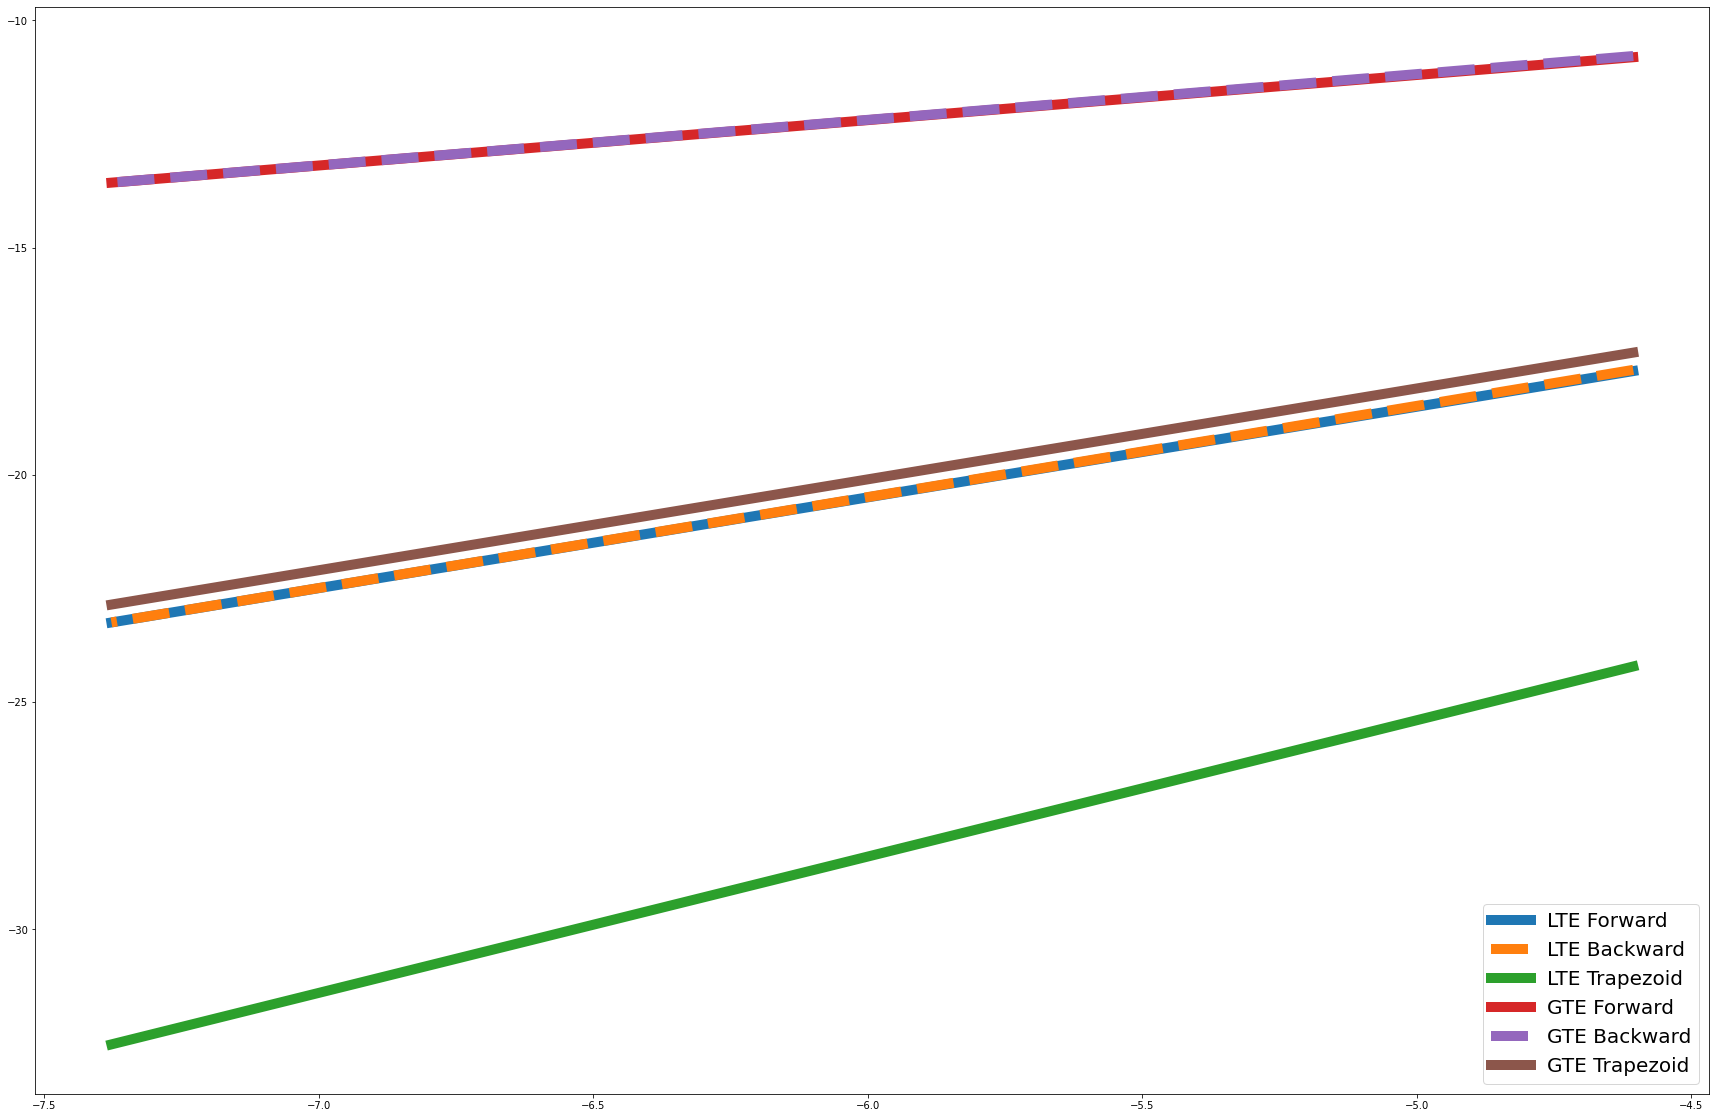

In [15]:

# I am blind
plt.rcParams['figure.figsize'] = [30, 20]
lw = 10 # 1.5 is original?
plt.plot(np.log(step),np.log(LTE_alt_forward), linewidth=lw, label = 'LTE Forward')
plt.plot(np.log(step),np.log(LTE_alt_backward),'--',  linewidth=lw,label = 'LTE Backward')
plt.plot(np.log(step),np.log(LTE_alt_trapezoid), linewidth=lw, label = 'LTE Trapezoid')
plt.plot(np.log(step),np.log(GTE_forward), linewidth=lw, label = 'GTE Forward')
plt.plot(np.log(step),np.log(GTE_backward),'--', linewidth=lw, label = 'GTE Backward')
plt.plot(np.log(step),np.log(GTE_trapezoid), linewidth=lw, label = 'GTE Trapezoid')
plt.legend(loc='lower right',prop={'size': 20} )

In [16]:
print("Local Truncation Errors Slope\n")
m_forward= np.polyfit(np.log(step),np.log(LTE_forward),1)
print(m_forward)
m_backward =np.polyfit(np.log(step),np.log(LTE_backward),1)
print(m_backward)
m_trapezoid =np.polyfit(np.log(step),np.log(LTE_trapezoid),1)
print(m_trapezoid)

Local Truncation Errors Slope

[1.93768848 1.16235114]
[1.92907431 1.10044215]
[2.95090398 0.15820852]


In [17]:
print("Alternate Local Truncation Errors Slope \n")
m_forward= np.polyfit(np.log(step),np.log(LTE_alt_forward),1)
print(m_forward)
m_backward =np.polyfit(np.log(step),np.log(LTE_alt_backward),1)
print(m_backward)
m_trapezoid =np.polyfit(np.log(step),np.log(LTE_alt_trapezoid),1)
print(m_trapezoid)


Alternate Local Truncation Errors Slope 

[ 1.99559793 -8.52754735]
[ 2.0043743  -8.46448727]
[  2.99999676 -10.40548952]


In [18]:
print("Global truncation Errors Slope \n")
m_forward= np.polyfit(np.log(step),np.log(GTE_forward),1)
print(m_forward)
m_backward =np.polyfit(np.log(step),np.log(GTE_backward),1)
print(m_backward)
m_trapezoid =np.polyfit(np.log(step),np.log(GTE_trapezoid),1)
print(m_trapezoid)

Global truncation Errors Slope 

[ 0.99559793 -6.22496226]
[ 1.0043743  -6.16190218]
[ 1.99999676 -8.10290443]
